In [1]:
import matplotlib as mpl
#%matplotlib notebook
import matplotlib.pyplot as plt
import time, pdb
import numpy as np
import os,imageio,glob#,pims
#import trackpy as tp
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.colors as colors

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from PIL import Image,ImageEnhance
import json

## Plot labels and predictions against image

In [ ]:
#User arguments
DATA_DIR = "../"
FIGURE_DIR = "Figures/" #Where to save the figures
if not os.path.isdir(FIGURE_DIR):
    os.makedirs(FIGURE_DIR)


#stage
stage_num = 36

#trajectories
t = pd.read_pickle("/home/mars/Carter/trajectories/new_locs_raw/"+str(stage_num)+"_traj_data.p")#"trajectories/"+str(stage_num)+"_traj_data_filled_in.p")

#Time point
i = 64


particles = t[t['frame']==i]
fig = plt.figure(figsize=(4,4))#10.88,6.72))
ax = fig.add_subplot(111)

for j in particles.particle.unique():

    #one particle over time
    particle = t[t['particle']==j]

    time = particle['frame']
    x = particle['x'][time==i]
    y = particle['y'][time==i]

    a = plt.plot(x,y,'.',color = "r",markersize=10)
    

f = open('/home/mars/Carter/cell-tracking/labeled_scratch_data/scratch3t3_1nMPDGF1_w2Cy5_s36_t64.json') 
  
# returns JSON object as  
# a dictionary 
data = json.load(f) 

for particle in data['shapes']:
    a = plt.plot(particle['points'][0][0],particle['points'][0][1],'P',color = "g",markersize=5)
    
    
#create frame image
ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim(200,450)
ax.set_ylim(200,500)
ax.set_title("Predicted cell locations",fontsize=20)

plt.plot(40,240,'P',color = "g",markersize=5,label="Labels")
plt.plot(40,240,'.',color = "r",markersize=10,label = "Predictions")

plt.legend(fontsize=15,loc=4)

im = Image.open(DATA_DIR+"scratch3t3_1nMPDGF1_w2Cy5_s"+str(stage_num)+"_t"+str(i)+".TIF")
imarray = np.array(im)

ax.imshow(imarray,cmap="gist_gray",vmin=510,vmax=1000)


fig_path = FIGURE_DIR+"frame_"+str(i)+"predictions.png"
plt.savefig(fig_path)

## Depict colored cell trajectories

In [ ]:
#User arguments
DATA_DIR = "../"
FIGURE_DIR = "Figures/" #Where to save the figures
if not os.path.isdir(FIGURE_DIR):
    os.makedirs(FIGURE_DIR)


my_cmap = cm.get_cmap('coolwarm')
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(1, 32)

#stage
stage_num = 39

#trajectories
#t = pd.read_pickle("/home/mars/Carter/trajectories/new_locs_raw/"+str(stage_num)+"_traj_data.p")#"trajectories/"+str(stage_num)+"_traj_data_filled_in.p")
t = pd.read_pickle("trajectories/"+str(stage_num)+"_traj_data_filled_in.p")

particles = t

fig = plt.figure(figsize=(4,4))#10.88,6.72))
ax = fig.add_subplot(111)

for j in particles.particle.unique():

    #one particle over time
    particle = t[t['particle']==j]

    if np.any(particle['x'].values>300) and np.any(particle['x'].values<500) and np.any(particle['y'].values>100) and np.any(particle['y'].values<300):
    
        x = np.array(particle['x'][particle['frame']<=32])
        y = np.array(particle['y'][particle['frame']<=32])
        coloring = np.array(particle['frame'][particle['frame']<=32])

        for i in np.arange(len(x)):
            ax.plot(x[i:i+2],y[i:i+2],color = my_cmap(my_norm(coloring[i])),linewidth=4)
    
#stage_num = 33
#norm = plt.Normalize(coloring.min(), coloring.max())
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm,cmap=my_cmap),ticks = np.linspace(1,32,6))
tick_texts = cb.ax.set_yticklabels(["0 hr.","1 hr.","2 hr.","3 hr.","4 hr.","5 hr."],fontsize=20)
plt.title("Cell trajectories over 5 hours",fontsize=25)
plt.xticks([])
plt.yticks([])
#plt.xlim(700,1300)
#plt.ylim(630,990)

## Snapshots of experiment over time

In [ ]:
#User arguments
DATA_DIR = "../"
FIGURE_DIR = "Figures/" #Where to save the figures
if not os.path.isdir(FIGURE_DIR):
    os.makedirs(FIGURE_DIR)

#stage
stage_num = 33


#Time point
i = 1

fig = plt.figure(figsize=(4,4))#10.88,6.72))
ax = fig.add_subplot(131)

im = Image.open(DATA_DIR+"scratch3t3_1nMPDGF1_w2Cy5_s"+str(stage_num)+"_t"+str(i)+".TIF")
imarray = np.array(im)
ax.imshow(imarray,cmap="gist_gray",vmin=510,vmax=1000)

i = 64
ax = fig.add_subplot(132)

im = Image.open(DATA_DIR+"scratch3t3_1nMPDGF1_w2Cy5_s"+str(stage_num)+"_t"+str(i)+".TIF")
imarray = np.array(im)
ax.imshow(imarray,cmap="gist_gray",vmin=510,vmax=1000)

i = 128
ax = fig.add_subplot(133)

im = Image.open(DATA_DIR+"scratch3t3_1nMPDGF1_w2Cy5_s"+str(stage_num)+"_t"+str(i)+".TIF")
imarray = np.array(im)
ax.imshow(imarray,cmap="gist_gray",vmin=510,vmax=1000)

## Plot changes in cell locations over time

In [ ]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,2,1)
#ax2 = fig.add_subplot(1,2,2)


stage_num = 21

#trajectories
t = pd.read_pickle("/home/mars/Carter/trajectories/new_locs_drift/"+str(stage_num)+"_traj_data.p")#"trajectories/"+str(stage_num)+"_traj_data_filled_in.p")

i=32
particles = t[t['frame']==i]

for j in particles.particle.unique():

    particle = t[t['particle'].values==j]
    
    if (i in particle['frame'].values) and ((i - 16) in particle['frame'].values) and (np.any(particle['y'].values < 400)):
        xf = np.float(np.array(particle['x'][particle['frame'].values==i]))
        x0 = np.float(np.array(particle['x'][particle['frame'].values==(i-16)]))
        
        yf = np.float(np.array(particle['y'][particle['frame'].values==i]))
        y0 = np.float(np.array(particle['y'][particle['frame'].values==(i-16)]))
        
        #plot straight line
        ax.plot(x0,y0,'r.')
        ax.plot(xf,yf,'b.')
        ax.plot(np.array((x0,xf)),np.array((y0,yf)),'k-')
        
        traj_inds = np.logical_and(particle['frame'].values<=i,particle['frame'].values>=(i-16))
        
        #plot trajectory
        ax.plot(particle['x'][traj_inds],particle['y'][traj_inds],'--',color=[.5,.5,.5])

## Calculate persistence / Alignment with Wound

/home/mars/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
/home/mars/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
/home/mars/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
/home/mars/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
/home/mars/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
/home/mars/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
/home/mars/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
/home/mars/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarni

'ax.scatter(persistance[0],wound_dir[0])\nax.set_title("Low Density")\nax2 = fig.add_subplot(122)\nax2.scatter(persistance[1],wound_dir[1])\nax2.set_title("High Density")\n'

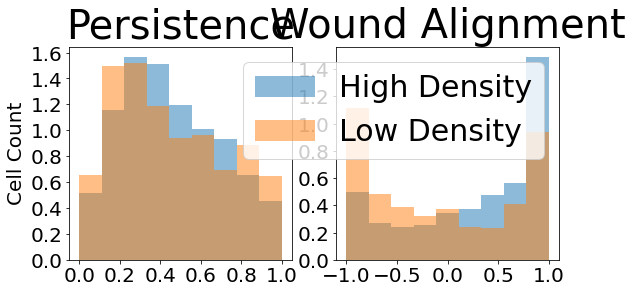

In [105]:
import seaborn as sns

wound = np.array([[0,-1],[0,-1],[0,-1],[0,-1],[0,1],[0,-1]])

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)

pix_to_micron = 1.0/1.157

persistance = [[],[]]
wound_dir = [[],[]]
displacements = [[],[]]
distances = [[],[]]
speeds = [[],[]]
stages = [[],[]]
particle_nums = [[],[]]

dt = 15

for i in np.arange(32,128,(128-32)/5,dtype=np.int):

    
    for jj,stage_num in enumerate([1,6,12,21,24,34]):
        
        #trajectories
        t = pd.read_pickle("/home/mars/Carter/trajectories/new_locs_drift/"+str(stage_num)+"_traj_data.p")#"trajectories/"+str(stage_num)+"_traj_data_filled_in.p"
        
        particles = t[t['frame']==i]
        
        for j in particles.particle.unique():

            particle = t[t['particle'].values==j]
            
            if stage_num == 34:
                wound_area = (np.any(particle['y'].values < 200))#400))
            elif stage_num == 24:
                wound_area = (np.any(particle['y'].values > 700))#600))
            else:
                wound_area = (np.any(particle['y'].values < 400))#600))
                    

            if (wound_area) and (i in particle['frame'].values) and ((i - dt) in particle['frame'].values):

                traj_inds = np.logical_and(particle['frame'].values<=i,particle['frame'].values>=(i-dt))

                x = particle['x'][traj_inds].values
                y = particle['y'][traj_inds].values
                displacement = np.linalg.norm([x[-1]-x[0],y[-1]-y[0]])*pix_to_micron
                distance = 0
                for k in np.arange(1,len(x)):
                    distance += np.linalg.norm([x[k]-x[k-1],y[k]-y[k-1]])*pix_to_micron
                
                if jj == 1 and j == 3149:
                    pdb.set_trace()
                
                if distance > 1.0:
                    
                    distances[jj//3].append(distance/(dt*0.1666))
                    
                    persistance[jj//3].append(displacement/distance)
                    displacements[jj//3].append(displacement)

                    disp = np.array([x[-1]-x[0],y[-1]-y[0]])
                    wound_dir[jj//3].append(np.dot(wound[jj],disp)/np.linalg.norm(disp))
                    
                    stages[jj//3].append(stage_num)
                    particle_nums[jj//3].append(j)
                
ax.set_ylabel("Cell Count",fontsize=20)
ax.hist(persistance[1],bins=np.linspace(0,1,10),alpha=0.5,label="High Density",density=True)
ax.hist(persistance[0],bins=np.linspace(0,1,10),alpha=0.5,label="Low Density",density=True)
ax.set_title("Persistence",fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = fig.add_subplot(122)
ax2.hist(wound_dir[1],bins=np.linspace(-1,1,10),alpha=0.5,label="High Density",density=True)
ax2.hist(wound_dir[0],bins=np.linspace(-1,1,10),alpha=0.5,label="Low Density",density=True)
ax2.set_title("Wound Alignment",fontsize=40)
plt.legend(fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplots_adjust(left=0.1,bottom=0.08,top=0.82,right = 0.95)


'''ax2.set_xticks(fontsize=12)
ax2.set_yticks(fontsize=12)'''

'''sns.set_style('whitegrid')
sns.kdeplot(persistance[0],bw=0.25,shade=True,ax=ax)
sns.kdeplot(persistance[1],bw=0.25,shade=True,ax=ax)

ax2 = fig.add_subplot(122)
sns.kdeplot(wound_dir[0],bw=0.25,shade=True,ax=ax2)
sns.kdeplot(wound_dir[1],bw=0.25,shade=True,ax=ax2)
'''
'''sns.kdeplot(persistance[0],wound_dir[0],ax=ax,shade=True)
ax2 = fig.add_subplot(122)
sns.kdeplot(persistance[1],wound_dir[1],ax=ax2,shade=True)'''


'''ax.scatter(persistance[0],wound_dir[0])
ax.set_title("Low Density")
ax2 = fig.add_subplot(122)
ax2.scatter(persistance[1],wound_dir[1])
ax2.set_title("High Density")
'''    
    
    

In [ ]:
fig = plt.figure(figsize=(11,6.2))
ax = fig.add_subplot(111)
ax.hist(displacements[0],bins=np.linspace(0,25,40),density=True,alpha=0.5,label="Low")
ax.hist(displacements[1],bins=np.linspace(0,25,40),density=True,alpha=0.5,label="High")

fontsize=30

plt.legend(fontsize=fontsize)

ax.set_title("Cell Speed",fontsize=fontsize)
ax.set_xlabel("Speed ($\mu$m/hr)",fontsize=fontsize)
ax.set_ylabel("Density",fontsize=fontsize)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig("Figures/Cell_speed_hist.pdf",format="pdf")

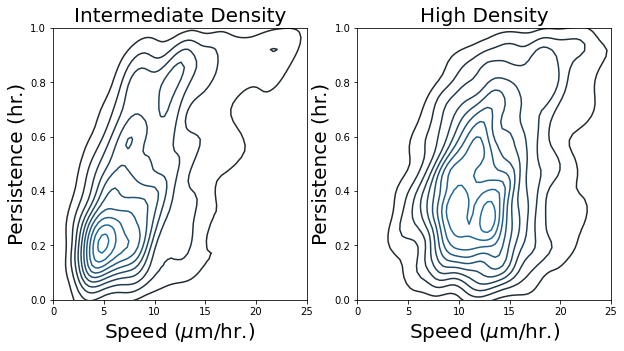

In [119]:
fig = plt.figure(figsize=(10,5))#11,6.2))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#speed = [[],[]]
#speed[0] = [d/(dt*0.1666) for d in displacements[0]]
#speed[1] = [d/(dt*0.1666) for d in displacements[1]]


fontsize=20

sns.kdeplot(distances[0],persistance[0],bw=0.2,shade=False,ax=ax1)
sns.kdeplot(distances[1],persistance[1],bw=0.2,shade=False,ax=ax2)
#ax1.scatter(distances[0],persistance[0])
#ax2.scatter(distances[1],persistance[1])


ax1.set_xlim(0,25)
ax2.set_xlim(0,25)
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)

ax1.set_xlabel("Speed ($\mu$m/hr.)",fontsize=fontsize)
ax2.set_xlabel("Speed ($\mu$m/hr.)",fontsize=fontsize)
ax1.set_ylabel("Persistence (hr.)",fontsize=fontsize)
ax2.set_ylabel("Persistence (hr.)",fontsize=fontsize)
ax1.set_title("Intermediate Density",fontsize=fontsize)
ax2.set_title("High Density",fontsize=fontsize)

plt.savefig("speed_v_persist_dt_"+str(dt)+".png")


In [98]:
speed_int_arr = np.array(speed[0])
speed_high_arr = np.array(speed[1])

pers_int_arr = np.array(persistance[0])
pers_high_arr = np.array(persistance[1])

stages_int_arr = np.array(stages[0])
stages_high_arr = np.array(stages[1])

particle_nums_int_arr = np.array(particle_nums[0])
particle_nums_high_arr = np.array(particle_nums[1])

ROI_high = np.logical_and(speed_high_arr>17.5,pers_high_arr>0.6)
ROI_int = np.logical_and(speed_int_arr>17.5,pers_int_arr>0.6)

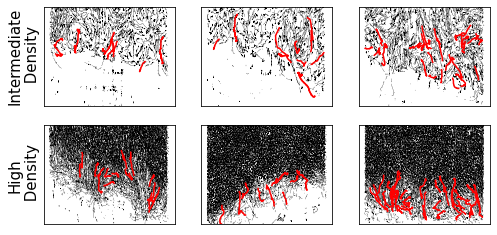

In [121]:
fig = plt.figure(figsize=(8,4))

stages_int = [1,6,12]
stages_high = [21,24,34]

for i,stage_int in enumerate(stages_int):
    ax = fig.add_subplot(2,3,i+1)
    
    ROI_stage = np.where(np.logical_and(ROI_int,stages_int_arr==stage_int))[0]
    t = pd.read_pickle("/home/mars/Carter/trajectories/new_locs_drift/"+str(stage_int)+"_traj_data.p")

    for j in t['particle'].unique():
        t_part = t[t['particle'].values==j]

        ax.plot(t_part['x'],t_part['y'],'k',linewidth=0.25)

    for part in ROI_stage:

        j = particle_nums_int_arr[part]
        t_part = t[t['particle'].values==j]

        ax.plot(t_part['x'],t_part['y'],'r')

    if i == 0:
        ax.set_ylabel("Intermediate\n Density",fontsize=15)
    ax.set_ylim([0,600])
    ax.set_xticks([])
    ax.set_yticks([])
    
for i,stage_high in enumerate(stages_high):
    
    ax = fig.add_subplot(2,3,i+4)
    ROI_stage = np.where(np.logical_and(ROI_high,stages_high_arr==stage_high))[0]
    t = pd.read_pickle("/home/mars/Carter/trajectories/new_locs_drift/"+str(stage_high)+"_traj_data.p")

    for j in t['particle'].unique():
        t_part = t[t['particle'].values==j]

        ax.plot(t_part['x'],t_part['y'],'k',linewidth=0.25)

    for part in ROI_stage:

        j = particle_nums_high_arr[part]
        t_part = t[t['particle'].values==j]

        ax.plot(t_part['x'],t_part['y'],'r')
    
    
    if stage_high==24:
        ax.set_ylim([424,1024])
        ax.invert_yaxis()
    else:
        ax.set_ylim([0,600])
        
    if i == 0:
        ax.set_ylabel("High\n Density",fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig("Figures/trajectories_persist_speed.pdf",format="pdf")

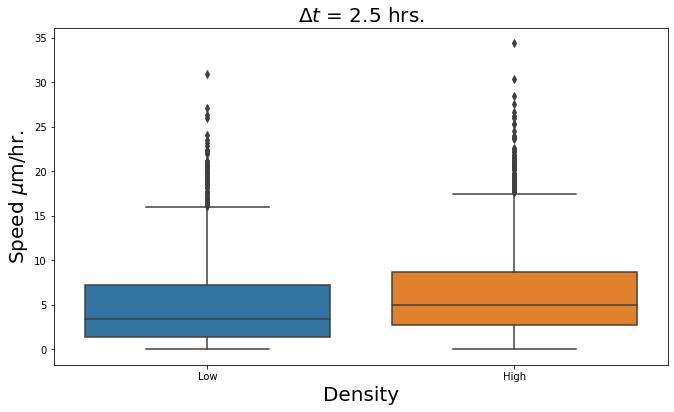

In [35]:
#ax2 = fig.add_subplot(122)

speed = [[],[]]
speed[0] = [d/(dt*0.1666) for d in displacements[0]]
speed[1] = [d/(dt*0.1666) for d in displacements[1]]

df = pd.DataFrame(speed[0],columns=["speed"])
df.insert(1,"Density","Low",True)
df.insert(2,"persistence",persistance[0])

df2 = pd.DataFrame(speed[1],columns=["speed"])
df2.insert(1,"Density","High",True)
df2.insert(2,"persistence",persistance[1])

df = pd.concat([df,df2])


fig = plt.figure(figsize=(11,6.2))
ax = fig.add_subplot(111)
#ax.scatter(displacements[0],persistance[0])
sns.boxplot(x="Density",y="speed",data=df,ax=ax)
#sns.boxplot(x=speed[1],ax=ax)
#sns.kdeplot(speed[1],persistance[1],bw=0.125,shade=False,ax=ax2)

ax.set_xlabel("Density",fontsize=fontsize)
ax.set_ylabel("Speed $\mu$m/hr.",fontsize=fontsize)
ax.set_title("$\Delta t$ = "+str(round(dt/6,1))+" hrs.",fontsize=fontsize)
plt.savefig("speed_dt_"+str(dt)+".pdf",format="pdf")

In [ ]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(speed[0], speed[1],alternative="less")
print("Speed statistics")
print('Statistics=%.3f, p=%.3f' % (stat, p))
stat, p = mannwhitneyu(persistance[0], persistance[1],alternative="less")
print("Persistence statistics")
print('Statistics=%.3f, p=%.3f' % (stat, p))

print("")
print("mean speeds %.3f, %.3f " % (np.mean(speed[0]),np.mean(speed[1])))
print("mean persistencess %.3f, %.3f " % (np.mean(persistance[0]),np.mean(persistance[1])))

## Plot all individual trajectories starting at origin

In [ ]:
import seaborn as sns

wound = np.array([[0,-1],[0,-1],[0,-1],[0,-1],[0,1],[0,-1]])

fig = plt.figure(figsize=(10,4))

pix_to_micron = 1.0/1.157

persistance = [[],[]]
wound_dir = [[],[]]
displacements = [[],[]]

#for i in np.arange(32,128,(128-32)/5,dtype=np.int):

    
for jj,stage_num in enumerate([1,6,12]):#,21,24,34]):
#for jj,stage_num in enumerate([21,24,34]):

    #trajectories
    t = pd.read_pickle("/home/mars/Carter/trajectories/new_locs_drift/"+str(stage_num)+"_traj_data.p")#"trajectories/"+str(stage_num)+"_traj_data_filled_in.p"

    particles = t[t['frame']==i]

    ax = fig.add_subplot(1,3,jj+1)
    
    for j in particles.particle.unique():

        particle = t[t['particle'].values==j]

        if stage_num == 34:
            wound_area = (np.any(particle['y'].values < 400))
        elif stage_num == 24:
            wound_area = (np.any(particle['y'].values > 600))
        else:
            wound_area = (np.any(particle['y'].values < 600))


        if (wound_area) :

            x = particle['x'] - particle['x'].iloc[0]
            y = particle['y'] - particle['y'].iloc[0]

            if stage_num != 24:
                y = -y
            
            ax.plot(x,y,"k",linewidth=0.5)
            #ax1.plot(x,"k")
            #ax2.plot(y,"k")

    ax.set_title("Replicate "+str(jj+1),fontsize=18)
    ax.set_xlim(-180,180)
    ax.set_ylim(-180,180)
    ax.set(adjustable="box",aspect="equal")
if stage_num == 12:
    plt.suptitle("Low density trajectories",fontsize=18)
    plt.savefig("Low_trajs.pdf",format="pdf")
if stage_num == 34:
    plt.suptitle("High density trajectories",fontsize=18)
    plt.savefig("High_trajs.pdf",format="pdf")
    

## Caclulate MSD

In [ ]:
import seaborn as sns
from scipy.optimize import minimize

wound = np.array([[0,-1],[0,-1],[0,-1],[0,-1],[0,1],[0,-1]])

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(111)

pix_to_micron = 1.0/1.157

displacements = [[] for i in range(128)]

#for i in np.arange(32,128,(128-32)/5,dtype=np.int):

D = []
P = []
#for jj,stage_num in enumerate([1,6,12]):#,21,24,34]):
for jj,stage_num in enumerate([21,24,34]):

    #trajectories
    t = pd.read_pickle("/home/mars/Carter/trajectories/new_locs_drift/"+str(stage_num)+"_traj_data.p")#"trajectories/"+str(stage_num)+"_traj_data_filled_in.p"

    #particles = t[t['frame']==i]

    for j in t.particle.unique():

        particle = t[t['particle'].values==j]

        if stage_num == 34:
            wound_area = (np.any(particle['y'].values < 400))
        elif stage_num == 24:
            wound_area = (np.any(particle['y'].values > 600))
        else:
            wound_area = (np.any(particle['y'].values < 600))


        if (wound_area) :

            x = np.array(particle['x']) - np.array(particle['x'].iloc[0])
            y = np.array(particle['y']) - np.array(particle['y'].iloc[0])
            
            if stage_num == 24:
                y = -y

            if len(x) > 1:
                
                for i in np.arange(len(x)):
                    displacements[i].append(((x[i] - x[0])**2 + (y[i] - y[0])**2)*(pix_to_micron)**2)

    displacement_mean = np.array([np.mean(d) for d in displacements])
    displacement_len = np.array([len(d) for d in displacements])
    ax1.plot(displacement_mean)
    
    t_vec = np.linspace(0,(1/6.0)*127,128)
    
    #remove nan values
    t_vec = t_vec[~np.isnan(displacement_mean)]
    displacement_len = displacement_len[~np.isnan(displacement_mean)]
    displacement_mean = displacement_mean[~np.isnan(displacement_mean)]
    
    #must have at least 20 trajectories
    #t_vec = t_vec[displacement_len>=20]
    #displacement_mean = displacement_mean[displacement_len>=20]
    
    
    #t less than 15
    displacement_mean = displacement_mean[t_vec < 15]
    t_vec = t_vec[t_vec < 15]
    
    
    def MSD_compare(q):
        return np.linalg.norm(displacement_mean - 4*q[0]*(t_vec-q[1]*(1-np.exp(-t_vec/q[1]))))
    
    res = minimize(MSD_compare, np.array([0,0]), method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
    
    
    q = res.x

    plt.figure()
    plt.plot(t_vec,displacement_mean,'b')
    plt.plot(t_vec,4*q[0]*(t_vec-q[1]*(1-np.exp(-t_vec/q[1]))),'r')
    
    plt.title("D = "+str(round(q[0],2))+"P = "+str(round(q[1],2)))
    
    D.append(q[0])
    P.append(q[1])

print(np.mean(D),np.std(D))
print(np.mean(P),np.std(P))
    

In [ ]:
len(displacements[-15])

## Direction Histogram

In [ ]:

import seaborn as sns


In [ ]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


wound = np.array([[0,-1],[0,-1],[0,-1],[0,-1],[0,1],[0,-1]])

first_rd = True



    
for jj,stage_num in enumerate([1,6,12]):
#for jj,stage_num in enumerate([21,24,34]):#24,21,34


    #trajectories
    t = pd.read_pickle("/home/mars/Carter/trajectories/new_locs_drift/"+str(stage_num)+"_traj_data.p")#"trajectories/"+str(stage_num)+"_traj_data_filled_in.p")

    #time points
    for i in np.arange(32,128,(128-32)/5,dtype=np.int):



        #want particles present in this frame
        particles = t[t['frame']==i]

        vel = []

        for j in particles.particle.unique():

            particle = t[t['particle']==j]

            if stage_num == 34:
                wound_area = (np.any(particle['y'].values < 400))
                wound_dir = np.array([0,-1])
                #wound_dir = np.array([-1,0]) #rotate true wound direction by pi/2 radians (clockwise) 
                                             #to make directly up (pi/2 radians) be wound direction

            elif stage_num == 24:
                wound_area = (np.any(particle['y'].values > 600))
                wound_dir = np.array([0,1])
                #wound_dir = np.array([0,1]) #rotate true wound direction by pi/2 radians (clockwise) 
                                             #to make directly up (pi/2 radians) be wound direction

            elif stage_num == 26:
                wound_area = (np.any(particle['y'].values < 200))
                wound_dir = np.array([0,1])
            else:
                wound_area = (np.any(particle['y'].values < 600))
                wound_dir = np.array([0,-1])
                #wound_dir = np.array([-1,0])


            if (wound_area) and (i in particle['frame'].values) and (i - 16) in particle['frame'].values:
                vel_x_tmp = np.array(particle['x'][particle['frame'].values==i]) - np.array(particle['x'][particle['frame'].values==(i-16)])
                #vel_x.append(np.float(vel_x_tmp))
                vel_y_tmp = np.array(particle['y'][particle['frame'].values==i]) - np.array(particle['y'][particle['frame'].values==(i-16)])
                #vel_y.append(np.float(vel_y_tmp))
                vel.append(np.array((np.float(vel_x_tmp),np.float(vel_y_tmp))))




        angles_tmp = np.zeros((len(vel),))
        for i,v in enumerate(vel):
            #angles[i] = np.arctan2(vel[i],wound_dir)
            angles_tmp[i] = angle_between(v,wound_dir)

            #get full 2pi radians
            if np.all(wound_dir == np.array([1,0])):
                if v[1] < 0:
                    angles_tmp[i] = 2*np.pi - angles_tmp[i]

            elif np.all(wound_dir == np.array([-1.0,0])):
                if v[1] > 0:
                    angles_tmp[i] = 2*np.pi - angles_tmp[i]

            elif np.all(wound_dir == np.array([0,-1.0])):
                if v[0] < 0:
                    angles_tmp[i] = 2*np.pi - angles_tmp[i]
            elif np.all(wound_dir == np.array([0,1.0])):
                if v[0] > 0:
                    angles_tmp[i] = 2*np.pi - angles_tmp[i]

        if first_rd == True:
            first_rd = False
            angles = angles_tmp
        else:
            angles = np.hstack((angles,angles_tmp))
                
plt.style.use('seaborn')

bins = 8

fig = plt.figure(figsize=(5,5))
polar_ax = fig.add_subplot(1, 1, 1, projection="polar")

# bin data for our polar histogram
count, bin = np.histogram(angles, range = (0,2*np.pi),bins=bins)
# Plot polar histogram
polar_ax.bar(bin[:-1], count, align='edge', color='C0',edgecolor="black",linewidth=1.2)

# Fiddle with labels and limits
polar_ax.set_xticks(np.linspace(0,7*np.pi/4,8).tolist())
polar_ax.set_xticklabels([r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$', r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$'],fontsize=15)

'''if stage_num == 21:
    polar_ax.set_title("High Density Migration Directions",fontsize=30)
elif stage_num == 1:
    polar_ax.set_title("Low Density Migration Directions",fontsize=30)
'''
plt.savefig("direction_hist_"+str(stage_num)+".pdf",format="pdf")

plt.figure()
sns.kdeplot(vel)

In [ ]:
wound_dir = np.array([-1,0])
angles_tmp = [0]
v = np.array([1,0])
i=0
#angles[i] = np.arctan2(vel[i],wound_dir)
angles_tmp[i] = angle_between(v,wound_dir)

#get full 2pi radians
if np.all(wound_dir == np.array([1,0])):
    if v[1] < 0:
        angles_tmp[i] = 2*np.pi - angles_tmp[i]

elif np.all(wound_dir == np.array([-1.0,0])):
    if v[1] > 0:
        angles_tmp[i] = 2*np.pi - angles_tmp[i]

elif np.all(wound_dir == np.array([0,-1.0])):
    if v[0] < 0:
        angles_tmp[i] = 2*np.pi - angles_tmp[i]
elif np.all(wound_dir == np.array([0,1.0])):
    if v[0] > 0:
        angles_tmp[i] = 2*np.pi - angles_tmp[i]
        
print(angles_tmp)